## Santander Coders 2023 - Track: Data Engineering
### Current Module: [4] Data Extraction I

### Developer: Lucas D. F. Rodrigues
#### Contacts:
- E-mail: lucas.darlindo@gmail.com
- GitHub: https://github.com/NepZR
- LinkedIn: https://linkedin.com/in/lucasdfr

### Notebook description:
> This Python Notebook was made with the main goal of demoing the Webhook API made for this project as a extra requirement. The API makes use of the [NewsAPI](https://newsapi.org/) `everything` endpoint to search news based on the informed criteria. After the search, if any result is found, they are indexed in the News Database (using MongoDB as core) and returned as a JSON Response to the requester (with HTTP Status Code 200).

### Imports

In [41]:
import requests
import itertools
import pymongo

from pprint import pprint

### 1. Webhook API Demo

#### 1.1. Request Configs

In [15]:
api_endpoint = "http://localhost:6000/search"

In [18]:
search_payload = {
    "keywords": ["medicine", "dna", "genomics", "genetic", "genetic disease", "chromosome"],
    "language": "en",
    "since_hours": 48
}

#### 1.2. Webhook Request
> The endpoint `/search` accepts only `POST` with the payload passed as a `JSON` in the `requests.post` method.<br>
> If successful, the HTTP Status Code will be 200. Else, can return 400 (if `language` or `keywords` data are empty).

In [33]:
response = requests.post(url=api_endpoint, json=search_payload)
print(response.status_code)

200


In [34]:
response_data = response.json()
print(response_data.keys())

dict_keys(['keywords', 'search_result', 'status'])


In [37]:
print(response_data["status"])
print(response_data["keywords"], "\n")

pprint(response_data["search_result"][0])

A total of 201 articles were found. Search Range: NOW-48h.
['medicine', 'dna', 'genomics', 'genetic', 'genetic disease', 'chromosome'] 

{'author': 'Zion Market Research',
 'content': 'NEW YORK, United States, Sept. 30, 2023 (GLOBE NEWSWIRE) -- Facts '
            'and Factors has published a new research report titled Cloud '
            'Based Drug Discovery Platform Market Size\r\n'
            ', Share, Growth Analysis Repo… [+16751 chars]',
 'description': 'The global cloud based drug discovery platform market size is '
                'projected to reach USD 6348.36 million by 2030 from its value '
                'USD 2351.45 million in 2022, at CAGR of 13.16% during the '
                'forecast period (2023- 2030), as highlighted in a report '
                'published by Facts &…',
 'publishedAt': '2023-09-30T17:53:00Z',
 'search_term': 'medicine',
 'source': {'id': None, 'name': 'GlobeNewswire'},
 'title': 'With 13.16% CAGR, Global Cloud Based Drug Discovery Platform Mark

### 2. Database with MongoDB

#### 2.1. Setting the News, Production, and Monitoring Databases

In [38]:
client = pymongo.MongoClient(host="localhost", port=5433, username="scoders", password="scoders")
db = client.get_database(name="scoders")

In [39]:
news_db = db.get_collection("news")
prod_db = db.get_collection("production")
monit_db = db.get_collection("monitoring")

#### 2.2. Getting data from News Database

In [43]:
for news in news_db.find():
    pprint(news)
    break

news_list = [news for news in news_db.find()]

print(f"\nNumber of Articles indexed into News Database: {len(news_list)} documents.")

{'_id': ObjectId('6519b22d8948b78f28be96d2'),
 'author': 'Zion Market Research',
 'content': 'NEW YORK, United States, Sept. 30, 2023 (GLOBE NEWSWIRE) -- Facts '
            'and Factors has published a new research report titled Cloud '
            'Based Drug Discovery Platform Market Size\r\n'
            ', Share, Growth Analysis Repo… [+16751 chars]',
 'description': 'The global cloud based drug discovery platform market size is '
                'projected to reach USD 6348.36 million by 2030 from its value '
                'USD 2351.45 million in 2022, at CAGR of 13.16% during the '
                'forecast period (2023- 2030), as highlighted in a report '
                'published by Facts &…',
 'entry_dt': datetime.datetime(2023, 10, 1, 17, 53, 49, 855000),
 'publishedAt': '2023-09-30T17:53:00Z',
 'search_term': 'medicine',
 'source': {'id': None, 'name': 'GlobeNewswire'},
 'title': 'With 13.16% CAGR, Global Cloud Based Drug Discovery Platform Market '
          'Size to Hi

#### 2.3. Getting data from Production Database - Transformed Data from News Database

In [44]:
for t_data in prod_db.find():
    pprint(t_data)
    break

transformed_data_list = [t_data for t_data in prod_db.find()]
print(f"\nNumber of Transformed Data indexed into Production Database: {len(transformed_data_list)} documents.")


Number of Transformed Data indexed into Production Database: 0 documents.


#### 2.4. Getting data from Monitoring Database - Monitoring Execution Reports

In [46]:
for m_data in monit_db.find():
    pprint(m_data)
    break

monit_list = [m_data for m_data in monit_db.find()]
print(f"\nNumber of Monitoring Reports indexed into Monitoring Database: {len(monit_list)} reports/docs.")

{'_id': ObjectId('6518786474414799ecba92d8'),
 'entry_dt': datetime.datetime(2023, 9, 30, 19, 35, 0, 546000),
 'service': 'monitoring',
 'terms': ['genomics', 'dna', 'genetic diseases'],
 'total_added': 0}

Number of Monitoring Reports indexed into Monitoring Database: 27 reports/docs.


#### 2.5. Using the Monitoring Reports to create a Pandas Dataframe and viewing data

In [47]:
import pandas as pd

df_monit = pd.DataFrame(data=monit_list)
df_monit.head(10)

,_id,terms,total_added,service,entry_dt
0,6518786474414799ecba92d8,"[genomics, dna, genetic diseases]",0,monitoring,2023-09-30 19:35:00.546
1,6518868874414799ecba92d9,"[genomics, dna, genetic diseases]",0,monitoring,2023-09-30 20:35:20.243
2,651894af74414799ecba92da,"[genomics, dna, genetic diseases]",0,monitoring,2023-09-30 21:35:43.130
3,6518a2d574414799ecba92db,"[genomics, dna, genetic diseases]",0,monitoring,2023-09-30 22:36:05.753
4,6518b0fa74414799ecba92dc,"[genomics, dna, genetic diseases]",0,monitoring,2023-09-30 23:36:26.589
5,6518bf2174414799ecba92dd,"[genomics, dna, genetic diseases]",0,monitoring,2023-10-01 00:36:49.780
6,6518cd4774414799ecba92de,"[genomics, dna, genetic diseases]",0,monitoring,2023-10-01 01:37:11.611
7,6518db6c74414799ecba92df,"[genomics, dna, genetic diseases]",0,monitoring,2023-10-01 02:37:32.736
8,6518e99274414799ecba92e0,"[genomics, dna, genetic diseases]",0,monitoring,2023-10-01 03:37:54.711
9,6518f7b974414799ecba92e1,"[genomics, dna, genetic diseases]",0,monitoring,2023-10-01 04:38:17.116


In [48]:
df_monit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   _id          27 non-null     object        
 1   terms        27 non-null     object        
 2   total_added  27 non-null     int64         
 3   service      27 non-null     object        
 4   entry_dt     27 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.2+ KB


In [49]:
total_added_since_started = df_monit.total_added.sum()
print(
    f"Since the News Monitoring Service Started, a total of {total_added_since_started} "
    "Articles were added into the News Database."
)

Since the News Monitoring Service Started, a total of 917 Articles were added into the News Database.


In [50]:
keywords_searched_since_started = set(itertools.chain(*df_monit.terms.values.tolist()))
print(
    "Since the News Monitoring Service and Webhook API Started, the following keywords were searched: "
    f"{list(keywords_searched_since_started)}. Total of keywords used: {len(keywords_searched_since_started)}."
)

Since the News Monitoring Service and Webhook API Started, the following keywords were searched: ['genetic diseases', 'dna', 'medicine', 'genetic', 'chromosome', 'genomics', 'genetic disease']. Total of keywords used: 7.


#### 2.6. Using the News Data to create a Pandas Dataframe for visualization

In [62]:
import pandas as pd

df_news = pd.DataFrame(data=news_list)
df_news.head(2)

,_id,source,author,title,description,url,urlToImage,publishedAt,content,search_term,entry_dt
0,6519b22d8948b78f28be96d2,"{'id': None, 'name': 'GlobeNewswire'}",Zion Market Research,"With 13.16% CAGR, Global Cloud Based Drug Disc...",The global cloud based drug discovery platform...,https://www.globenewswire.com/news-release/202...,https://ml.globenewswire.com/Resource/Download...,2023-09-30T17:53:00Z,"NEW YORK, United States, Sept. 30, 2023 (GLOBE...",medicine,2023-10-01 17:53:49.855
1,6519b22d8948b78f28be96d3,"{'id': 'the-times-of-india', 'name': 'The Time...",AP,What would a government shutdown mean for me? ...,While the Senate pushes forward with bipartisa...,https://economictimes.indiatimes.com/news/inte...,"https://img.etimg.com/thumb/msid-104073756,wid...",2023-09-30T17:36:45Z,NEW YORK - With gridlock persisting in Washing...,medicine,2023-10-01 17:53:49.862


In [63]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   _id          194 non-null    object        
 1   source       194 non-null    object        
 2   author       172 non-null    object        
 3   title        194 non-null    object        
 4   description  194 non-null    object        
 5   url          194 non-null    object        
 6   urlToImage   169 non-null    object        
 7   publishedAt  194 non-null    object        
 8   content      194 non-null    object        
 9   search_term  194 non-null    object        
 10  entry_dt     194 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(10)
memory usage: 16.8+ KB


In [64]:
df_news["publishedAt"] = df_news["publishedAt"].apply(pd.to_datetime)
df_news["source"] = df_news["source"].apply(lambda src_data: src_data["name"])
df_news.head(1)

,_id,source,author,title,description,url,urlToImage,publishedAt,content,search_term,entry_dt
0,6519b22d8948b78f28be96d2,GlobeNewswire,Zion Market Research,"With 13.16% CAGR, Global Cloud Based Drug Disc...",The global cloud based drug discovery platform...,https://www.globenewswire.com/news-release/202...,https://ml.globenewswire.com/Resource/Download...,2023-09-30 17:53:00+00:00,"NEW YORK, United States, Sept. 30, 2023 (GLOBE...",medicine,2023-10-01 17:53:49.855


In [56]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   _id          194 non-null    object             
 1   source       194 non-null    object             
 2   author       172 non-null    object             
 3   title        194 non-null    object             
 4   description  194 non-null    object             
 5   url          194 non-null    object             
 6   urlToImage   169 non-null    object             
 7   publishedAt  194 non-null    datetime64[ns, UTC]
 8   content      194 non-null    object             
 9   search_term  194 non-null    object             
 10  entry_dt     194 non-null    datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), object(9)
memory usage: 16.8+ KB


<Axes: xlabel='source', ylabel='Articles'>

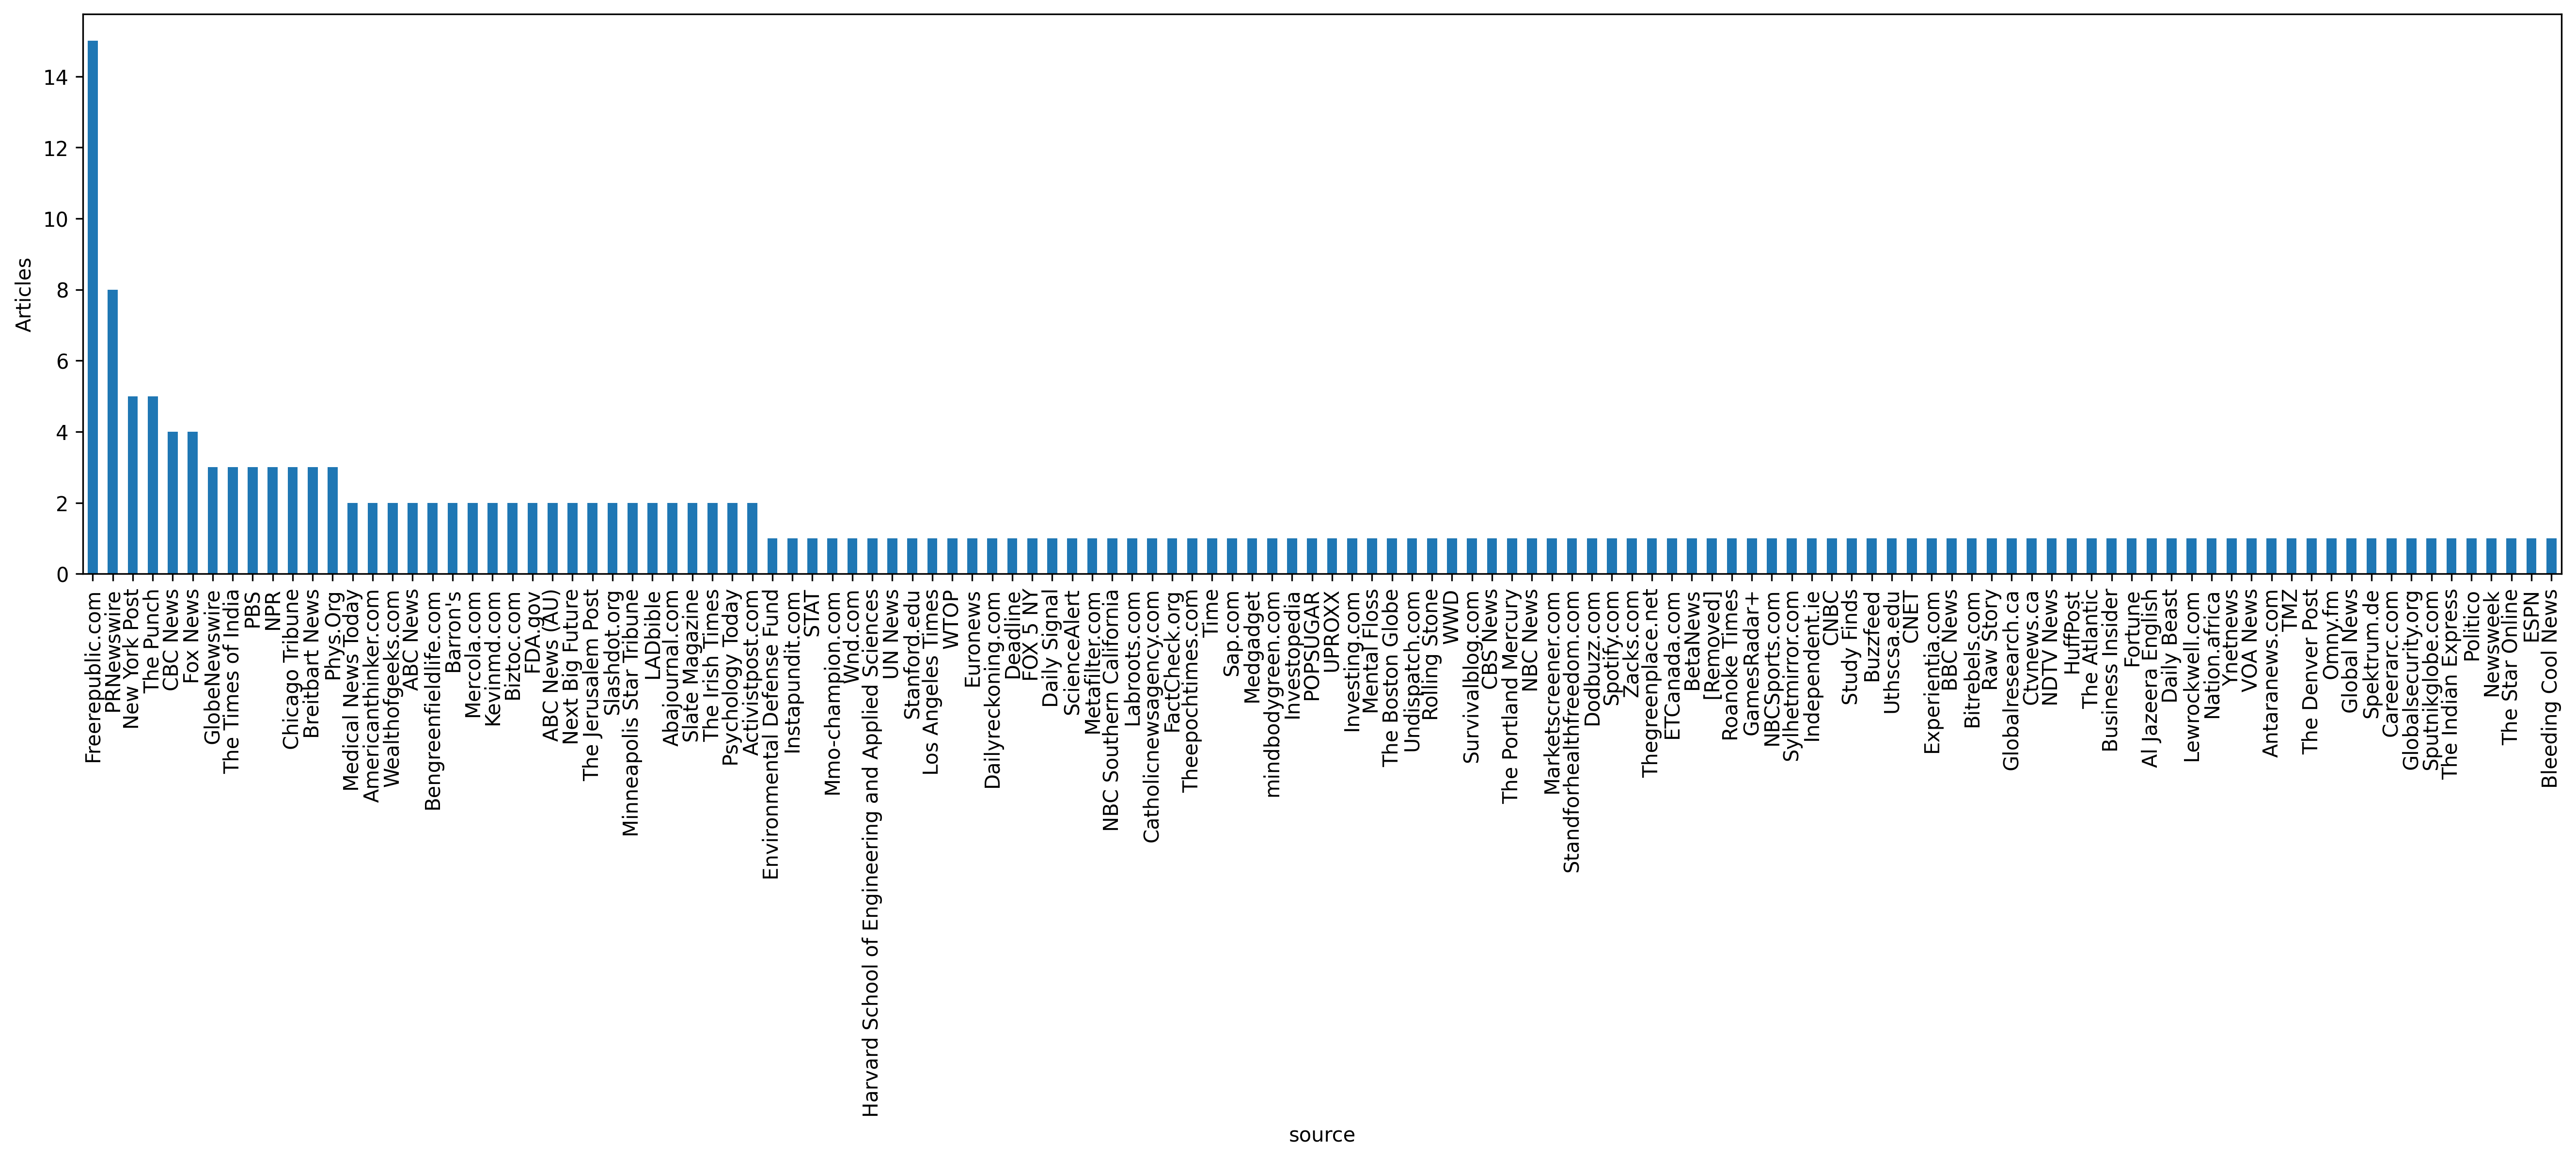

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 5), dpi=300)
plt.xlabel("Source")
plt.ylabel("Articles")

df_news["source"].value_counts().plot(kind="bar")